467063
470488
0.7845516583473847
0.8348063710737297
   type  level  total_volume
0     1      1       1195015
1     1      2       1195021
2     1      3       1195034
3     1      4       1195065
4     1      5       1195124
5     2      1       1195015
6     2      2       1195022
7     2      3       1195032
8     2      4       1195041
9     2      5       1195092


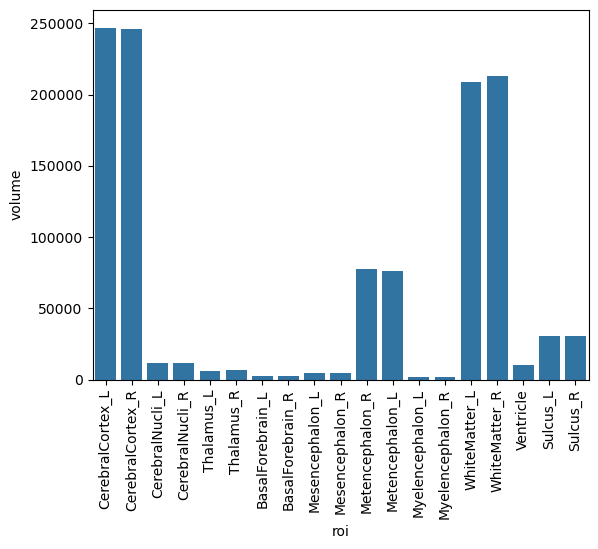

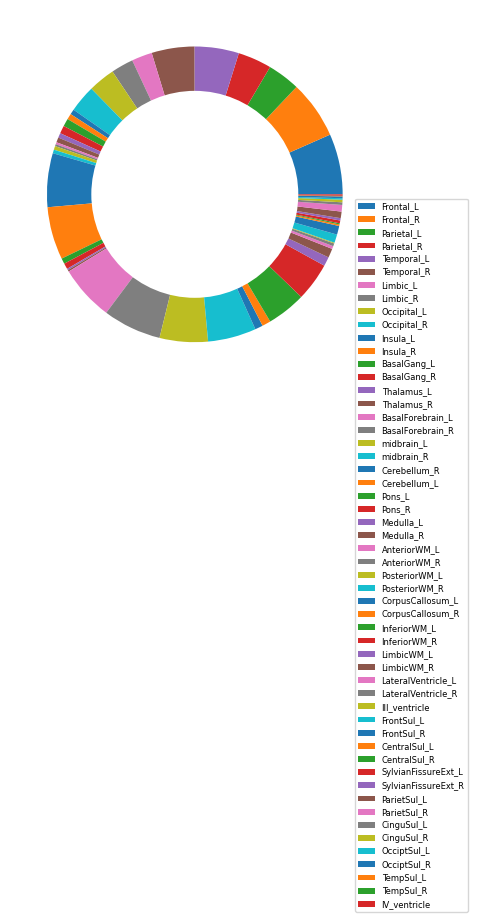

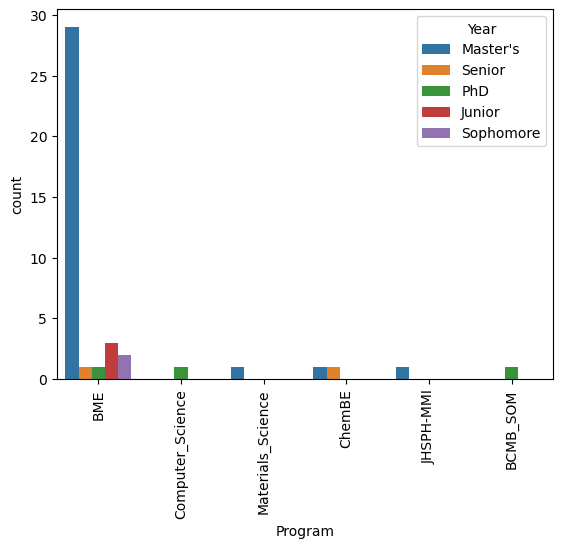

,Location,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
0,United States,675896.0,731455.0,778684.0,820172.0,869578.0,917540.0,969531.0,1026103.0,1086280.0,...,1696222.0,1804672.0,1918820.0,2010690.0,2114221.0,2194625.0,2272582.0,2365948.0,2435624.0,2562824.0
1,Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
2,Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0
3,Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,...,28190.0,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0
4,Arkansas,5632.0,6022.0,6397.0,6810.0,7343.0,7817.0,8393.0,8814.0,9407.0,...,14611.0,15431.0,16426.0,17246.0,18071.0,18735.0,19356.0,20076.0,20500.0,21980.0


In [ ]:
## Matthew Lamblaot homework 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### questions using Kirb21 data


kirb21_df= pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv") ## reading csv file
kirb21_df.head(4) ## checking csv file contents
kirby906a_ax_df= kirb21_df.loc[(kirb21_df['rawid']=="kirby906a_ax.img")].copy() ##creating new dataframe with only values that where rawid= kirby906a_ax.img
kirby906a_ax_df
kirby906a_ax_df.head(20) ##double checking if new dataframe is correct
telencephalon_L= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==1) & (kirby906a_ax_df['roi'] =='Telencephalon_L')].copy() ##creating new dataframe that only consists of type1 level1 data for Telecephalon_L
telencephalon_L.head(1)
telencephalon_L_volume= telencephalon_L.loc[12540,'volume'] ##assigning new variable to be the value for volume of this dataframe
print(telencephalon_L_volume) #printing volume value

telencephalon_R= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==1) & (kirby906a_ax_df['roi'] =='Telencephalon_R')].copy()##creating new dataframe that only consists of type1 level1 data for Telecephalon_R
telencephalon_R.head(1)
telencephalon_R_volume= telencephalon_R.loc[12541,'volume']##assigning new variable to be the value for volume of this dataframe
print(telencephalon_R_volume) # printing volume value

ICV_fraction= (telencephalon_L_volume+telencephalon_R_volume)/kirby906a_ax_df.loc[12540,'icv'] ##creating ICV fraction variable that is the fraction of telencephalon volume to ICV
TBV_fraction= (telencephalon_L_volume+telencephalon_R_volume)/kirby906a_ax_df.loc[12540,'tbv']## creation of TBV fraction variable that is the fraciton of telecephalon volume to TBV
print(ICV_fraction)
print(TBV_fraction)



all_regions_df= (kirby906a_ax_df.groupby(["type","level"], as_index=False)["volume"].sum())## create new dataframe that groups the data in kirby906 by type and level, then takes the sum of the volumes for those parameters
all_regions_df= all_regions_df.rename(columns={"volume":"total_volume"}) ##renames the column name to be total_volume instead of volume
print(all_regions_df)

t1l2= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==2)].copy() ##creating new dataframe that only contains type 1 level 2 data
Volume_bar= sns.barplot(x='roi', y='volume', data=t1l2) #creates a bar graph depicting the volume from each part of the brain from t1l2
plt.xticks(rotation=90) #rotates tick 
plt.show()
plt.clf() ##clear the current plot figure
plt.cla() ##clear the current ploy axes



t1l3= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==3)] ##creates new dataframe for only data that is type 1 level 3 from kirby
labels= t1l3['roi'] ##creates labels from roi of t1l3
#fig, ax=plt.subplots()
Volume_donut= plt.pie( t1l3['volume'],textprops={'fontsize':'smaller'}, rotatelabels=270)##create donut plot
center_circle= plt.Circle((0,0), 0.70, fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
#plt.axis('equal')
plt.legend(labels,loc="upper right", fontsize=6, bbox_to_anchor=(1.25,.5))
plt.show()


############## data using class_interests_df
plt.clf()
plt.cla()
class_interests_df= pd.read_table("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt")
sns.countplot(x='Program', hue='Year', data=class_interests_df)
plt.xticks(rotation=90) #rotates tick
plt.show()



#############data using gene expression dataset

gene_expression_df= pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv") ## reading csv file
#print(gene_expression_df)
#row_means=gene_expression_df.mean(axis=1)
#gene_expression_df_pt1= gene_expression_df.sub(row_means, axis=0)
#print(gene_expression_df_pt1)



###### data using healthcare_df
healthcare_df= pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv", skiprows=2) ## reading csv file
healthcare_df.head(5)
#plt.clf()
#plt.cla()
#sns.scatterplot( x= "Location", y="Timeframe", data=healthcare_df)

 

